#### Installation

In [1]:
!pip install pandas

In [2]:
!pip install numpy

### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#### Dataset Preprocessing:
#### 1. Data Collections
#### 2. Data Cleaning

In [ ]:
# lloading the dataset in the dataframe
# as it is table with rows, and columns 
df = pd.read_csv('train.csv')

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Here I am printing the information of the dataframe:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- This is a more clearer count extracted out of dataframe that has less entries than 891 that are total entries for every column. 
- Keeping in view these are the columns to be taken care.

In [ ]:
print("Age has ", df['Age'].count(), "out of 891 entries")

Age has  714 out of 891 entries


In [10]:
print("Cabin has ", df['Cabin'].count(), "out of 891 entries")

Cabin has  204 out of 891 entries


In [11]:
print("Embarked has ", df['Embarked'].count(), "out of 891 entries")

Embarked has  889 out of 891 entries


##### Findings: These columns have null values
- Age (891 - 177 = 714)
- Cabin (891 - 687 = 204)
- Embarked (891 - 2 = 889)

In [ ]:
print("These are the null values sum that the columns have: ")
df.isna().sum()

These are the null values sum that the columns have: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. Handle the Missing Values
- Age

In [16]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
df['Age'].median()

28.0

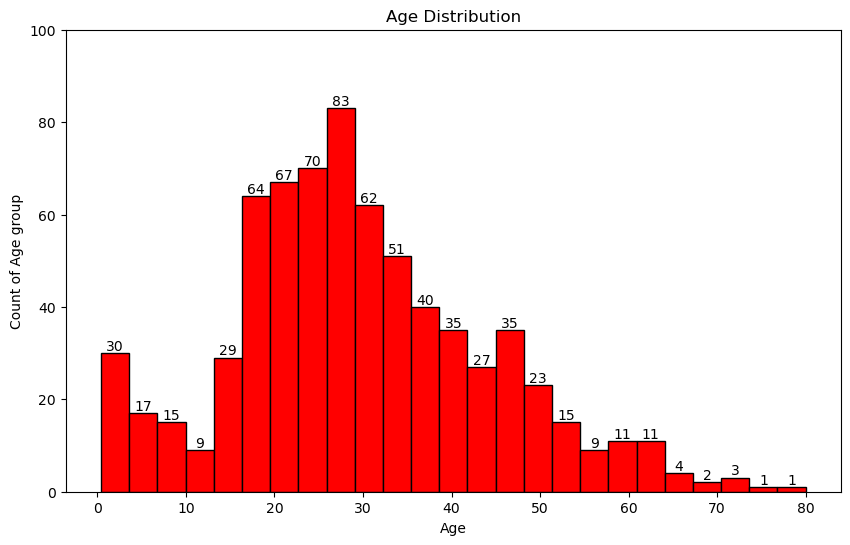

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Age Distribution')
plt.hist(x=df['Age'], bins = 25, ec='black', color='red')

# for the counts on the histogram bars
for bIN in plt.gca().patches:
    height = bIN.get_height()
    plt.text(bIN.get_x() + bIN.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Count of Age group')
plt.ylim(0,100)
plt.show()


- Now ere u can see we can have a sort of idea that how much people belong to the specific age group.
- But lets create the categories for the people to have more better idea based on age 


In [31]:
print("Skewness:", df['Age'].skew(axis=0))

Skewness: 0.38910778230082704


In [35]:
# as the skewness value is low so that, i will use the mean to fill null values
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipykernel_40833/1619356884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [36]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

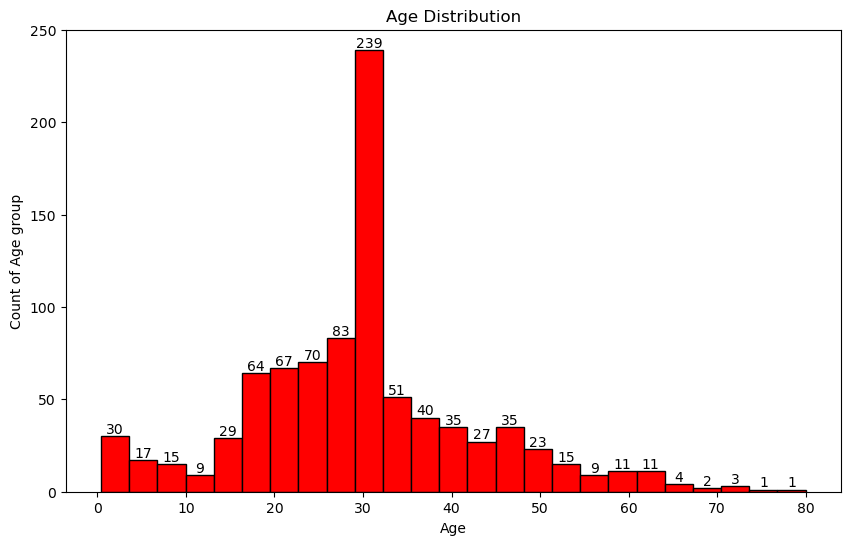

In [46]:
plt.figure(figsize=(10,6))
plt.title('Age Distribution')
plt.hist(x=df['Age'], bins = 25, ec='black', color='red')

# for the counts on the histogram bars
for bIN in plt.gca().patches:
    height = bIN.get_height()
    plt.text(bIN.get_x() + bIN.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Count of Age group')
plt.ylim(0,250)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
